In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import os
from glob import glob
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [33]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    #ax.set_title(t)
    plt.tight_layout()


# Graphing Propogation

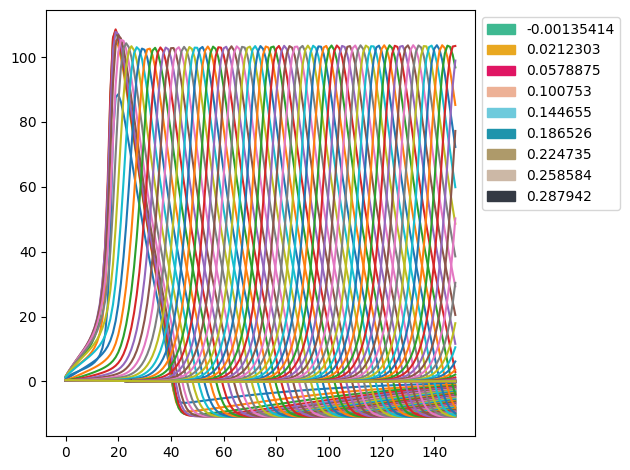

In [34]:
propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/HH_Propagate_output.csv"))
#display(propogate_ap_df)
graph_df(propogate_ap_df,0,len(propogate_ap_df))


# Video Gen

In [35]:
def graph_time_frame(data_frame,time_frame):
    row1 = data_frame.iloc[time_frame]
    x = np.arange(0,len(row1),step = 1)
    fig, ax = plt.subplots()
    ax.plot(x,row1)
    ax.set_xlabel("axon location")
    ax.set_ylabel("V")
    #ax.set_title(f"time: {time_frame}")
    ax.set_ylim(-20,120)
    plt.plot()
    plt.tight_layout()
    plt.savefig(f"../graphs/2D/{time_frame}")
    plt.close() 

In [36]:
graph_time_frame(propogate_ap_df,20)

In [37]:
os.makedirs("../graphs/2D", exist_ok=True)

old_files = glob("../graphs/2D/*.png")
for f in old_files:
    os.remove(f)

In [38]:
for i in range(len(propogate_ap_df)): 
    graph_time_frame(propogate_ap_df,i)

In [39]:
now = datetime.now()
current_time = now.strftime("%H_%M")
print(current_time)
os.system("convert -delay 1 -loop 0 $(ls -1 ../graphs/2D/*.png | sort -V) -quality 95 ../vid/{}_{}.mp4".format("propagation",current_time))

08_22


1